# Project 3 Task 2

In [692]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import collections
from nltk import bigrams
import dateutil

In [693]:
df = pd.read_csv('Data/2010.csv')

for i in range(11, 23):
    fstring = 'Data/20'+str(i)+'.csv'
    temp = pd.read_csv(fstring)
    df = pd.concat([df, temp])

In [694]:
df

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,[],NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0
1024,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Let’s make the roaring 20’s happen!,en,[],...,[],NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0
1025,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,[],NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0
1026,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla 🔥,und,[],...,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0


In [695]:
tweets = df[['date','tweet']].copy(deep =True)

In [696]:
tweets

,date,tweet
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon..."
0,2011-12-28 22:27:08,@TheOnion So true :)
1,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...
2,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...
3,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki..."
...,...,...
1023,2022-01-03,https://t.co/LA9hPzVlGx
1024,2022-01-02,Let’s make the roaring 20’s happen!
1025,2022-01-02,Great work by Tesla team worldwide!
1026,2022-01-01,@BLKMDL3 @Tesla 🔥


### Cleaning the data

In [697]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Function for data cleaning
def clean_data(tweet):
    
    # Removing any @, #, & tags
    tweet = re.sub("[@&#][A-Za-z0-9_]+"," ", tweet.lower())
    
    # Removing any links
    tweet = re.sub(r'http\S+', ' ', tweet)
    tweet = re.sub(r"www.\S+", ' ', tweet)
    
    # Removing any punctuations marks
    tweet = re.sub('[()!?]', ' ', tweet)
    tweet = re.sub('\[.*?\]',' ', tweet)
    
    # Removing any non alphanumeric charectars/ emoji etc.
    tweet = re.sub("[^a-z0-9]"," ", tweet)
    
    # Eliminating numbers
    tweet = re.sub(r'[0-9]+', ' ', tweet)
    
    # Tokenize the sentences to words
    words = word_tokenize(tweet)
    
    # Removing the stop words
    stop_words = set(stopwords.words('english'))
    filtered = [w for w in words if not w in stop_words]
    
    if len(filtered)==0:
        return float('NaN')
    else: 
        return ' '.join(filtered)

In [698]:
# function to format the date.
def format_date(date):
    return dateutil.parser.parse(date)

In [699]:
# Cleaning the data
df['tweet'] = df['tweet'].apply(clean_data)
df['date'] = df['date'].apply(format_date)

In [700]:
# function to extracting year from dates
def year(date):
    return date.year

df['year'] = df['date'].apply(year)

In [701]:
# Filtering out null rows
df = df[df['tweet'].notna()]

### Calculating the word frequencies

In [702]:
from nltk.probability import FreqDist

# Function to find the frequency Distribution of the 
def freq(document):
    return nltk.FreqDist(document)

In [703]:
# Calculating word frequencies per year
f_2017= freq(word_tokenize(' '.join(df[df['year']==2017]['tweet'])))
f_2018= freq(word_tokenize(' '.join(df[df['year']==2018]['tweet'])))
f_2019= freq(word_tokenize(' '.join(df[df['year']==2019]['tweet'])))
f_2020= freq(word_tokenize(' '.join(df[df['year']==2020]['tweet'])))
f_2021= freq(word_tokenize(' '.join(df[df['year']==2021]['tweet'])))
f_2022= freq(word_tokenize(' '.join(df[df['year']==2022]['tweet'])))

In [704]:
# Top 10 words for the year 2017 by elon musk based on the count/frequency
f_2017 = pd.DataFrame(f_2017.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)

In [705]:
f_2017.head(10)

,word,Frequency
104,tesla,222
56,model,177
156,yes,162
64,good,159
37,like,147
62,one,138
16,first,129
52,next,129
8,yeah,117
113,would,108


In [706]:
# Top 10 words for the year 2018 by elon musk based on the count/frequency
f_2018 = pd.DataFrame(f_2018.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)

In [707]:
f_2018.head(10)

,word,Frequency
1,tesla,877
112,car,363
28,yes,324
187,good,308
134,model,294
102,like,285
285,would,231
70,people,222
206,even,195
64,next,192


In [708]:
# Top 10 words for the year 2019 by elon musk based on the count/frequency
f_2019 = pd.DataFrame(f_2019.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)

In [709]:
f_2019.head(10)

,word,Frequency
195,tesla,504
106,yes,307
55,would,198
191,great,193
162,starship,189
487,like,170
42,good,169
360,high,148
51,much,144
206,time,141


In [710]:
# Top 10 words for the year 2020 by elon musk based on the count/frequency
f_2020 = pd.DataFrame(f_2020.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)

In [711]:
f_2020.head(10)

,word,Frequency
11,tesla,191
74,yes,160
25,great,128
200,much,120
51,good,112
393,would,94
339,high,91
125,sure,88
208,yeah,83
126,haha,83


In [712]:
# Top 10 words for the year 2021 by elon musk based on the count/frequency
f_2021 = pd.DataFrame(f_2021.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)

In [713]:
f_2021.head(10)

,word,Frequency
48,tesla,213
65,great,102
143,good,98
111,much,93
156,would,89
96,haha,89
117,like,89
32,time,86
807,beta,77
927,high,74


In [714]:
# Top 10 words for the year 2022 by elon musk based on the count/frequency
f_2022 = pd.DataFrame(f_2022.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)

In [715]:
f_2022.head(10)

,word,Frequency
63,tesla,62
54,people,34
60,would,32
107,yes,32
245,one,30
323,good,28
7,starlink,28
158,car,26
686,true,22
134,high,22


### Histogram for Word Frequencies

In [716]:
# Plotting histogram for word frequencies
import plotly.express as px

In [717]:
# 2017 tweets
px.histogram(f_2017, x ='Frequency', nbins =50, title = "2017")

In [718]:
# 2018 tweets
px.histogram(f_2018, x ='Frequency', nbins =50, title = "2018")

In [719]:
# 2019 tweets
px.histogram(f_2019, x ='Frequency', nbins =50, title = "2019")

In [720]:
# 2020 tweets
px.histogram(f_2020, x ='Frequency', nbins =50, title = "2020")

In [721]:
# 2021 tweets
px.histogram(f_2021, x ='Frequency', nbins =50, title = "2021")

In [722]:
# 2022 tweets
px.histogram(f_2022, x ='Frequency', nbins =30, title = "2022")

## Zipf's law Log Plots

In [723]:
# As the dataframes are all sorted in descending order adding a rank column to the dataframes
f_2017['rank'] = range(1,len(f_2017)+1)

f_2018['rank'] = range(1,len(f_2018)+1)

f_2019['rank'] = range(1,len(f_2019)+1)

f_2020['rank'] = range(1,len(f_2020)+1)

f_2021['rank'] = range(1,len(f_2021)+1)

f_2022['rank'] = range(1,len(f_2022)+1)

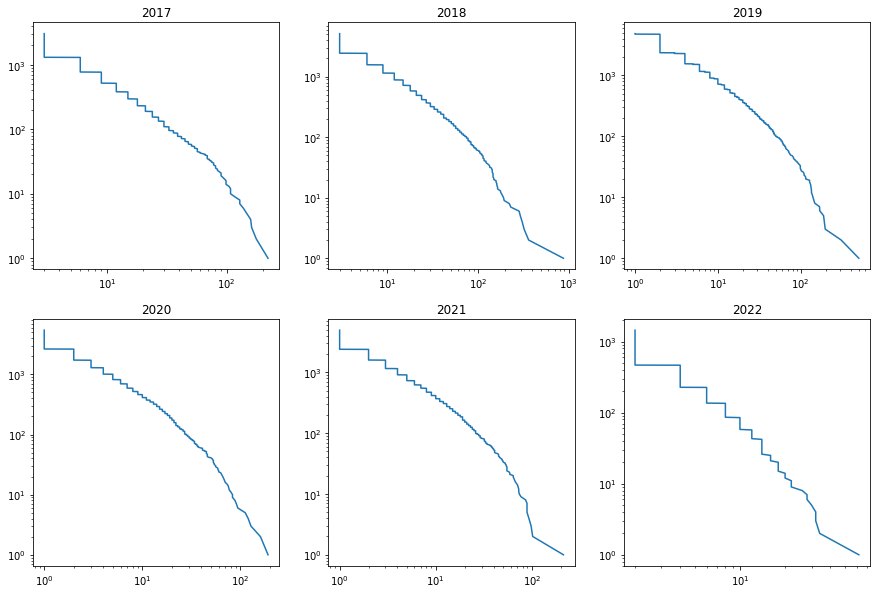

In [724]:
plt.figure(figsize = (15, 10))

# 2017 plot
plt.subplot(2,3,1)
plt.title("2017")
plt.loglog(f_2017['Frequency'], f_2017['rank'] )

# 2018 plot
plt.subplot(2,3,2)
plt.title("2018")
plt.loglog(f_2018['Frequency'], f_2018['rank'] )

# 2019 plot
plt.subplot(2,3,3)
plt.title("2019")
plt.loglog(f_2019['Frequency'], f_2019['rank'] )

# 2020 plot
plt.subplot(2,3,4)
plt.title("2020")
plt.loglog(f_2020['Frequency'], f_2020['rank'] )

# 2021 plot
plt.subplot(2,3,5)
plt.title("2021")
plt.loglog(f_2021['Frequency'], f_2021['rank'] )

# 2022 plot
plt.subplot(2,3,6)
plt.title("2022")
plt.loglog(f_2022['Frequency'], f_2022['rank'] )


plt.show()

# Bigram network graphs, year wise for elon musk

In [725]:
# Tokenization of the tweets
def tokenize(string):
    return word_tokenize(string)

In [726]:
df['Tokens'] = df['tweet'].apply(tokenize)

<ipython-input-726-47efe8911f0c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [727]:
# Extracting bi-grams for the year 2017
bigram = [list(bigrams(tweet)) for tweet in df[df['year']==2017]['Tokens']]

# Flatten list of bigrams
list_bigrams = list(itertools.chain(*bigram))

# Count words in bigrams
counts_bigrams = collections.Counter(list_bigrams)

# Creating a dataframe for the bigrams
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

In [728]:
bigram_df

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


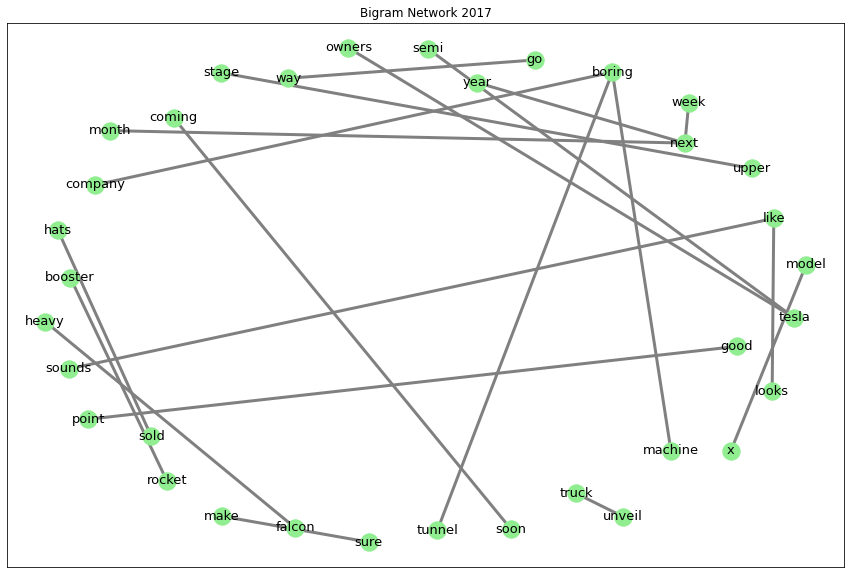

In [729]:
# Create dictionary of bigrams and their counts
dict = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for key, value in dict[0].items():
    G.add_edge(key[0], key[1])

fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=13,
                 width=3,
                 edge_color = 'grey',
                 node_color = '#90ee90',
                 with_labels = True,
                 ax=ax)

plt.title("Bigram Network 2017")
    
plt.show()


In [730]:
# Extracting bi-grams for the year 2018
bigram = [list(bigrams(tweet)) for tweet in df[df['year']==2018]['Tokens']]

# Flatten list of bigrams
list_bigrams = list(itertools.chain(*bigram))

# Count words in bigrams
counts_bigrams = collections.Counter(list_bigrams)

# Creating a dataframe for the bigrams
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

In [731]:
bigram_df

,bigram,count
0,"(next, year)",75
1,"(coming, soon)",66
2,"(boring, company)",48
3,"(falcon, heavy)",42
4,"(tesla, team)",35
5,"(good, idea)",33
6,"(dual, motor)",33
7,"(test, drive)",30
8,"(end, next)",30
9,"(model, performance)",30


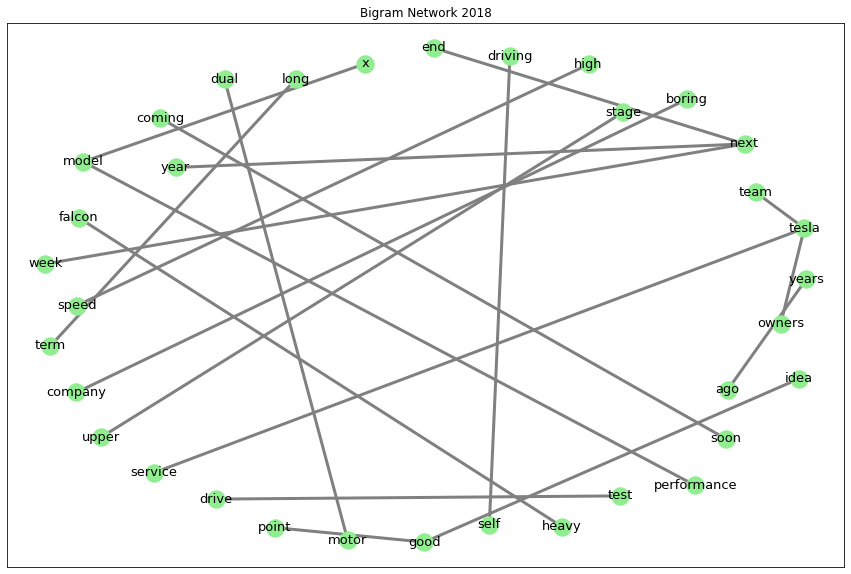

In [732]:
# Create dictionary of bigrams and their counts
dict = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for key, value in dict[0].items():
    G.add_edge(key[0], key[1])
    
fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=13,
                 width=3,
                 edge_color = 'grey',
                 node_color = '#90ee90',
                 with_labels = True,
                 ax=ax)

plt.title("Bigram Network 2018")
    
plt.show()

In [733]:
# Extracting bi-grams for the year 2019
bigram = [list(bigrams(tweet)) for tweet in df[df['year']==2019]['Tokens']]

# Flatten list of bigrams
list_bigrams = list(itertools.chain(*bigram))

# Count words in bigrams
counts_bigrams = collections.Counter(list_bigrams)

# Creating a dataframe for the bigrams
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

In [734]:
bigram_df

,bigram,count
0,"(self, driving)",44
1,"(coming, soon)",40
2,"(full, self)",40
3,"(next, week)",28
4,"(next, year)",28
5,"(super, heavy)",28
6,"(early, access)",26
7,"(smart, summon)",22
8,"(tesla, solar)",22
9,"(good, point)",18


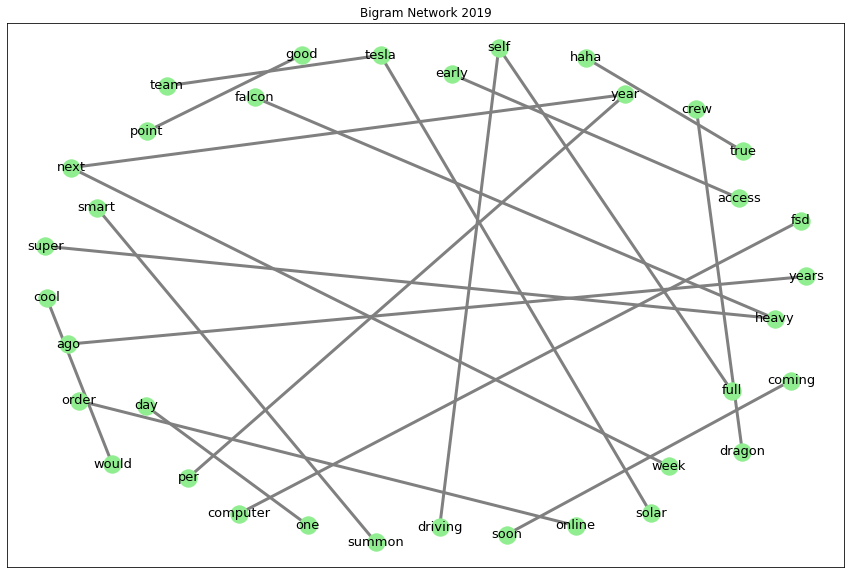

In [735]:
# Create dictionary of bigrams and their counts
dict = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for key, value in dict[0].items():
    G.add_edge(key[0], key[1])
    
fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=13,
                 width=3,
                 edge_color = 'grey',
                 node_color = '#90ee90',
                 with_labels = True,
                 ax=ax)

plt.title("Bigram Network 2019")
    
plt.show()

In [736]:
# Extracting bi-grams for the year 2020
bigram = [list(bigrams(tweet)) for tweet in df[df['year']==2020]['Tokens']]

# Flatten list of bigrams
list_bigrams = list(itertools.chain(*bigram))

# Count words in bigrams
counts_bigrams = collections.Counter(list_bigrams)

# Creating a dataframe for the bigrams
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

In [737]:
bigram_df

,bigram,count
0,"(pretty, much)",35
1,"(coming, soon)",19
2,"(giga, berlin)",18
3,"(static, fire)",13
4,"(haha, true)",12
5,"(false, positive)",12
6,"(long, term)",12
7,"(good, point)",11
8,"(next, week)",10
9,"(years, ago)",10


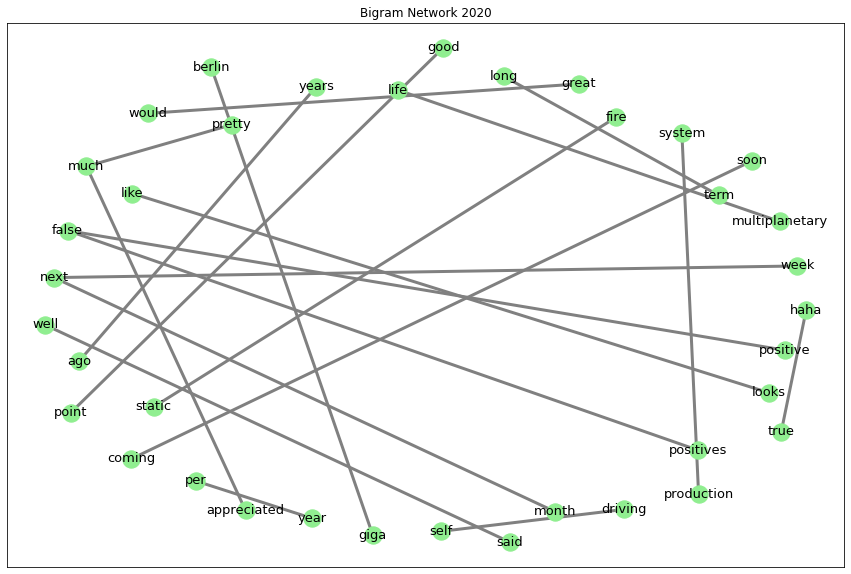

In [738]:
# Create dictionary of bigrams and their counts
dict = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for key, value in dict[0].items():
    G.add_edge(key[0], key[1])
    
fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=13,
                 width=3,
                 edge_color = 'grey',
                 node_color = '#90ee90',
                 with_labels = True,
                 ax=ax)

plt.title("Bigram Network 2020")
    
plt.show()

In [739]:
# Extracting bi-grams for the year 2021
bigram = [list(bigrams(tweet)) for tweet in df[df['year']==2021]['Tokens']]

# Flatten list of bigrams
list_bigrams = list(itertools.chain(*bigram))

# Count words in bigrams
counts_bigrams = collections.Counter(list_bigrams)

# Creating a dataframe for the bigrams
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

In [740]:
bigram_df

,bigram,count
0,"(fsd, beta)",21
1,"(long, term)",19
2,"(pure, vision)",16
3,"(life, multiplanetary)",16
4,"(self, driving)",16
5,"(next, week)",15
6,"(next, year)",14
7,"(super, heavy)",13
8,"(pretty, much)",13
9,"(supply, chain)",13


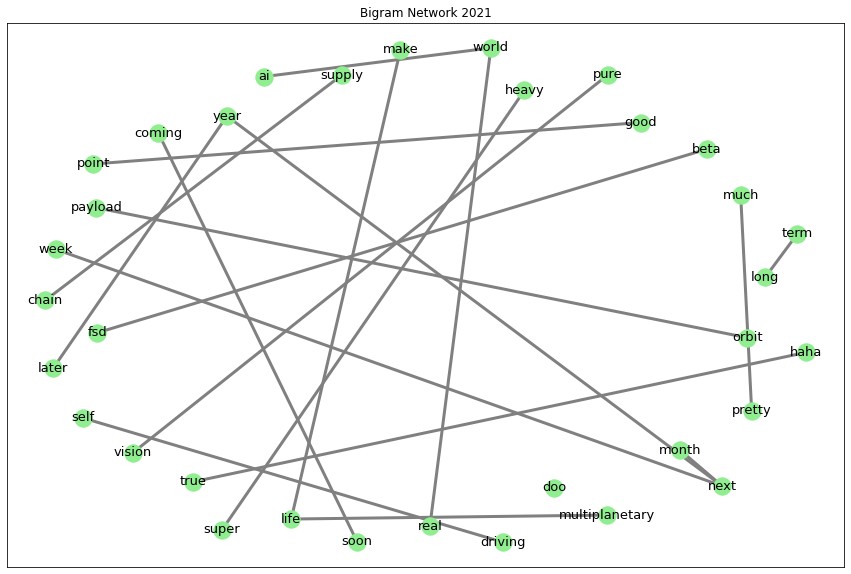

In [741]:
# Create dictionary of bigrams and their counts
dict = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for key, value in dict[0].items():
    G.add_edge(key[0], key[1])
    
fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=13,
                 width=3,
                 edge_color = 'grey',
                 node_color = '#90ee90',
                 with_labels = True,
                 ax=ax)

plt.title("Bigram Network 2021")
    
plt.show()

In [742]:
# Extracting bi-grams for the year 2022
bigram = [list(bigrams(tweet)) for tweet in df[df['year']==2022]['Tokens']]

# Flatten list of bigrams
list_bigrams = list(itertools.chain(*bigram))

# Count words in bigrams
counts_bigrams = collections.Counter(list_bigrams)

# Creating a dataframe for the bigrams
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

In [743]:
bigram_df

,bigram,count
0,"(birth, rate)",8
1,"(model, x)",8
2,"(sustainable, energy)",6
3,"(work, tesla)",6
4,"(self, driving)",6
5,"(neural, nets)",6
6,"(last, year)",6
7,"(life, multiplanetary)",6
8,"(starlink, terminals)",4
9,"(news, sources)",4


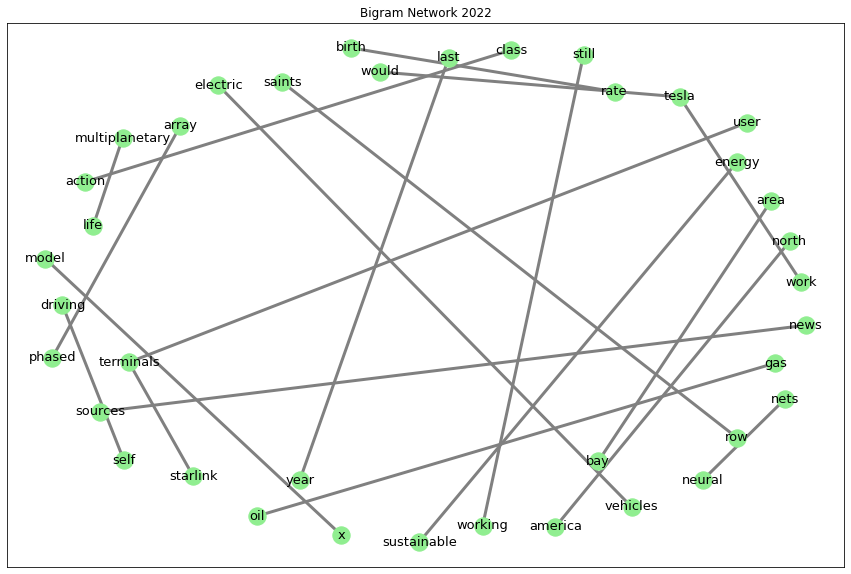

In [690]:
# Create dictionary of bigrams and their counts
dict = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for key, value in dict[0].items():
    G.add_edge(key[0], key[1])
    
fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=13,
                 width=3,
                 edge_color = 'grey',
                 node_color = '#90ee90',
                 with_labels = True,
                 ax=ax)

plt.title("Bigram Network 2022")
    
plt.show()